In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import shutil
import random
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
def unzip_file(zip_file_path, extract_to_path):
    os.makedirs(extract_to_path, exist_ok=True)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

In [ ]:
# shutil.rmtree("/content/combined_dataset")

In [ ]:
unzip_file("/content/drive/MyDrive/smart_glasses/from_danial/combined_dataset.zip", "/content/datasets/combined_dataset")

In [ ]:
len(os.listdir("/content/datasets/combined_dataset/train/labels"))

54966

In [ ]:
len(os.listdir("/content/datasets/combined_dataset/train/images"))

54966

In [ ]:
os.listdir("/content/datasets/combined_dataset/train/images")[8]

'B599_62553.jpg'

In [ ]:
len(os.listdir("/content/datasets/combined_dataset/val/labels"))

9701

In [ ]:
len(os.listdir("/content/datasets/combined_dataset/val/images"))

9701

In [ ]:
os.listdir("/content/datasets/combined_dataset/val/images")[0]

'COCO_val2014_000000309539_7068.jpg'

['15', '0.4589166666666667', '0.5523166666666667', '0.35788333333333333', '0.8579833333333333']


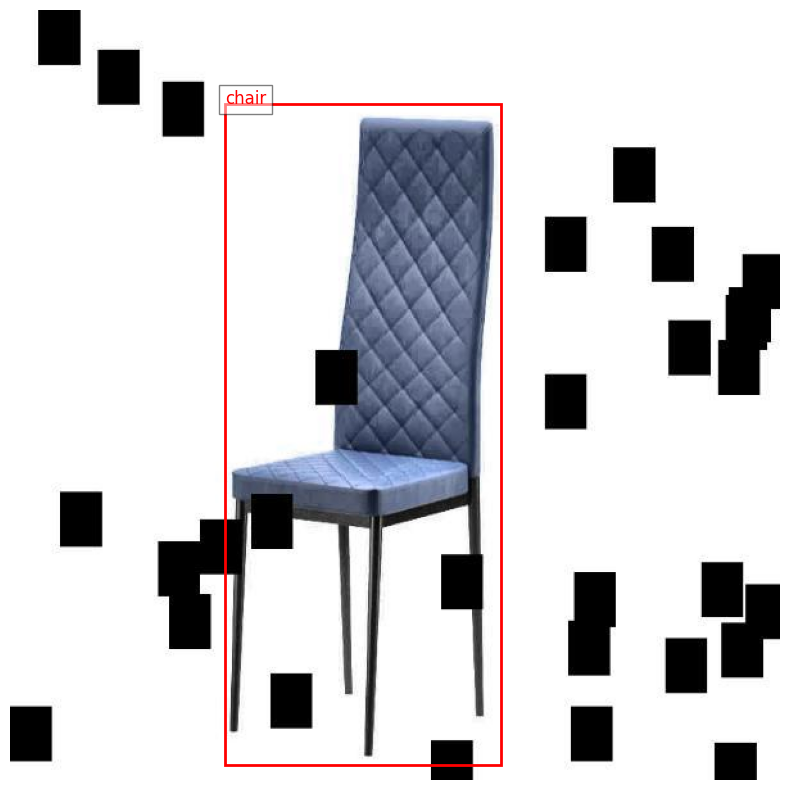

In [ ]:


images_path = '/content/datasets/combined_dataset/train/images/'
labels_path = '/content/datasets/combined_dataset/train/labels'
class_names =  ["person", "bicycle", "car", "motorcycle", "bed", "bus", "desk", "table", "door", "fridge", "toilet", "sofa", "sink", "microwave", "bench", "chair", "fan", "closet", "stairs", "crosswalk", "pedestrian Traffic Light (walk)", "pedestrian Traffic Light (stop)", "face", "A", "B", "W", "Y"]

def plot_image_with_labels(img_path, label_path):
    img = cv2.imread(img_path)

    with open(label_path, 'r') as file:
        lines = file.readlines()

    plt.figure(figsize=(10, 10))
    plt.imshow(img)

    height, width, _ = img.shape

    for line in lines:
        parts = line.strip().split()
        print(parts)
        class_id = int(parts[0])
        x_center, y_center, bbox_width, bbox_height = map(float, parts[1:5])

        x_min = int((x_center - bbox_width / 2) * width)
        y_min = int((y_center - bbox_height / 2) * height)
        x_max = int((x_center + bbox_width / 2) * width)
        y_max = int((y_center + bbox_height / 2) * height)

        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='red', linewidth=2, facecolor='none'))

        plt.text(x_min, y_min, class_names[class_id], color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

image_file = os.path.join(images_path, '176_aug_v1_chair_26_jpg.rf.2b49c0b7a792153e397c7a1820e0122f_25029.jpg')
label_file = os.path.join(labels_path, '176_aug_v1_chair_26_jpg.rf.2b49c0b7a792153e397c7a1820e0122f_25029.txt')

plot_image_with_labels(image_file, label_file)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# model = YOLO("yolo11s.pt")

100%|██████████| 18.4M/18.4M [00:00<00:00, 238MB/s]


In [ ]:
model = YOLO("/content/drive/MyDrive/smart_glasses/runs10epochs4-3-2025/detect/train/weights/last.pt")

In [ ]:
results = model.train(data="data.yaml", epochs=10, imgsz=640, batch=32, device = "cuda")

Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/smart_glasses/runs5epochs4-3-2025/detect/train/weights/last.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

100%|██████████| 755k/755k [00:00<00:00, 22.2MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.1MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/combined_dataset/train/labels... 54966 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54966/54966 [02:01<00:00, 450.67it/s]


train: New cache created: /content/datasets/combined_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4904, len(boxes) = 158742. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/combined_dataset/val/labels... 9701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9701/9701 [00:21<00:00, 442.48it/s]


val: New cache created: /content/datasets/combined_dataset/val/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 946, len(boxes) = 27615. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000323, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_

       1/10      8.14G     0.8534     0.7232      1.101         88        640: 100%|██████████| 1718/1718 [18:27<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [02:03<00:00,  1.23it/s]


                   all       9701      27615      0.784      0.685      0.747      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.08G      0.919     0.8229      1.144         62        640: 100%|██████████| 1718/1718 [20:32<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:58<00:00,  1.29it/s]


                   all       9701      27615      0.808      0.669       0.74      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.08G      0.936     0.8612      1.157         78        640: 100%|██████████| 1718/1718 [20:19<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:49<00:00,  1.39it/s]


                   all       9701      27615      0.764      0.633      0.698      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.13G     0.9426     0.8767      1.166         46        640: 100%|██████████| 1718/1718 [19:42<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:51<00:00,  1.36it/s]


                   all       9701      27615      0.761      0.691       0.73      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.07G     0.9153     0.8305      1.146         45        640: 100%|██████████| 1718/1718 [19:48<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:52<00:00,  1.35it/s]


                   all       9701      27615      0.797      0.704      0.756      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.09G     0.8906     0.7884      1.127         46        640: 100%|██████████| 1718/1718 [19:41<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:53<00:00,  1.34it/s]


                   all       9701      27615      0.792      0.718       0.76      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.09G     0.8645     0.7495      1.107         47        640: 100%|██████████| 1718/1718 [19:39<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:55<00:00,  1.32it/s]


                   all       9701      27615      0.835      0.714      0.774       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.12G     0.8386     0.7111      1.089         99        640: 100%|██████████| 1718/1718 [19:40<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:52<00:00,  1.35it/s]


                   all       9701      27615      0.829      0.728      0.783      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.14G     0.8151      0.674      1.073         85        640: 100%|██████████| 1718/1718 [19:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:50<00:00,  1.38it/s]


                   all       9701      27615      0.829      0.732       0.79      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.17G     0.7971     0.6457       1.06         46        640: 100%|██████████| 1718/1718 [19:14<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:51<00:00,  1.36it/s]


                   all       9701      27615      0.836       0.74      0.793      0.628

10 epochs completed in 3.602 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,423,249 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 152/152 [01:49<00:00,  1.38it/s]


                   all       9701      27615      0.832       0.73       0.79      0.631
                person       3341      13428      0.846      0.628      0.762      0.525
               bicycle        170        384        0.8      0.328      0.457       0.27
                   car        631       2244      0.766      0.516      0.614      0.401
            motorcycle        185        444      0.795      0.493      0.622      0.394
                   bed        265        289      0.756      0.692      0.763      0.601
                   bus        204        300      0.809      0.683       0.75      0.616
                 table        794        975      0.763      0.532      0.621      0.469
                  door        100        112      0.879      0.841      0.902      0.766
                fridge        152        165      0.809      0.679       0.77      0.648
                toilet        160        206      0.784       0.83      0.863      0.696
                  sof

In [ ]:
# copytree("/content/runs", "/content/drive/MyDrive/smart_glasses/runs2")

In [ ]:
import shutil
import os

source_folder = '/content/runs'
destination_folder = '/content/drive/MyDrive/smart_glasses/runs10epochs5-3-2025'

while True:
  if os.path.exists(destination_folder):
    break

  os.makedirs(destination_folder, exist_ok=True)

  shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

  print("Folder copied successfully!")


Folder copied successfully!


# Evaluate

In [ ]:
model = YOLO("/content/drive/MyDrive/smart_glasses/runs10epochs5-3-2025/detect/train/weights/best.pt")

In [ ]:
metrics = model.val(data = "data.yaml",conf = 0.33, iou = 0.6)

Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/datasets/combined_dataset/val/labels.cache... 9701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9701/9701 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 946, len(boxes) = 27615. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 607/607 [02:04<00:00,  4.86it/s]


                   all       9701      27615      0.834      0.733      0.813      0.683
                person       3341      13428       0.85      0.638      0.768      0.591
               bicycle        170        384       0.79      0.344      0.591      0.399
                   car        631       2244      0.762      0.527      0.653      0.485
            motorcycle        185        444       0.82      0.502      0.687      0.498
                   bed        265        289      0.766      0.692      0.788      0.661
                   bus        204        300      0.799       0.69      0.788      0.683
                 table        794        975      0.753      0.538      0.668      0.562
                  door        100        112      0.872      0.848        0.9      0.794
                fridge        152        165      0.796      0.685      0.784      0.706
                toilet        160        206      0.776      0.825      0.857      0.718
                  sof

In [ ]:
val_path = "/content/runs/detect/val2"


shutil.copytree(val_path, "/content/drive/MyDrive/smart_glasses/runs10epochs5-3-2025/detect/val2")

'/content/drive/MyDrive/smart_glasses/runs10epochs5-3-2025/detect/val2'

In [ ]:
from google.colab import runtime
runtime.unassign()